In [1]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
#dev.off()

**Activity:**

In [6]:
install.packages("formattable")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(readr)
library(plyr)
library(dplyr)
library(ggplot2)
library(formattable)


In [96]:
# Read your data here; 
spotify = read.csv("featuresdf.csv")
daily_spotify = read.csv("spotify_us.csv")
daily_spotify$Streams <- as.double(daily_spotify$Streams)
head(daily_spotify)



Position,Track.Name,Artist,Streams,URL,Date,Region
<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfiSGPJeQR,01-01-2017,us
2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGoGARUTsd,01-01-2017,us
3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrkmtKl66Z,01-01-2017,us
4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw,01-01-2017,us
5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM5OQSfIo,01-01-2017,us
6,Broccoli (feat. Lil Yachty),DRAM,763259,https://open.spotify.com/track/7yyRTcZmCiyzzJlNzGC9Ol,01-01-2017,us


In [97]:
#converting milliseconds to seconds
spotify$duration_ms <- round(spotify$duration_ms / 1000)
colnames(spotify)[15] <- "duration"

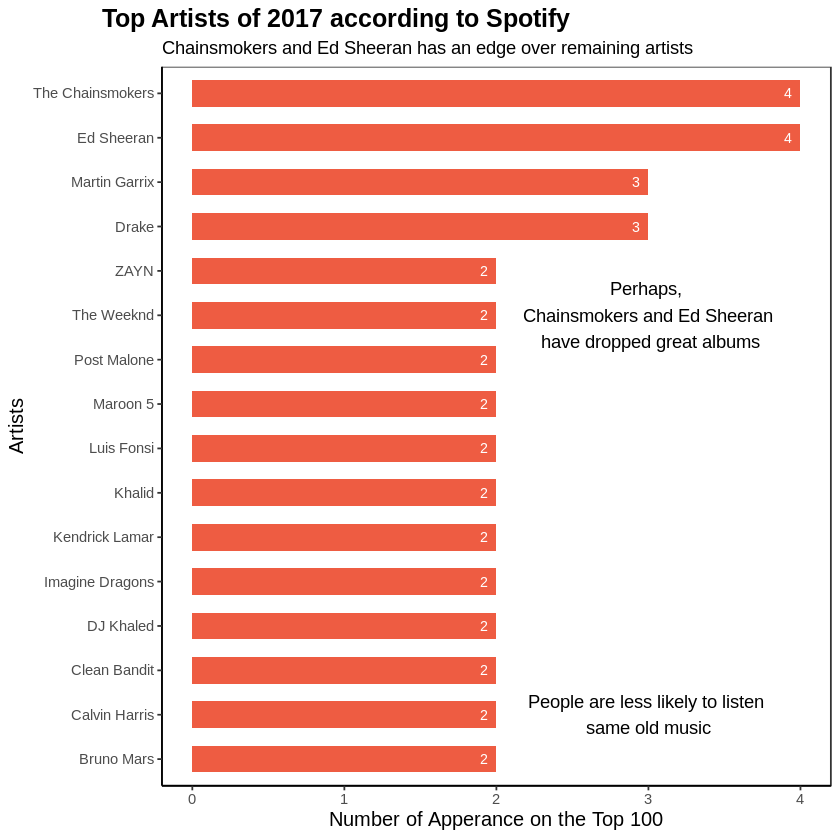

In [136]:
top_artists <- spotify %>%
    group_by(artists)  %>%
    summarise(n_apperance = n()) %>%
    filter(n_apperance > 1) %>%
    arrange(desc(n_apperance))

# in order to visualise the list in descending order 
top_artists$artists <- factor(top_artists$artists, levels = top_artists$artists[order(top_artists$n_apperance)]) 

ggplot(top_artists, aes(x = artists, y = n_apperance)) +
    geom_bar(stat = "identity",  fill = "tomato2", width = 0.6 ) + 
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    labs(title = "Top Artists of 2017 according to Spotify",subtitle = "Chainsmokers and Ed Sheeran has an edge over remaining artists", x = "Artists", y = "Number of Apperance on the Top 100")+
    annotate("text", x = 2 , y = 3, label = "People are less likely to listen \n same old music ", color = "black") +
    annotate("text", x = 11 , y = 3, label = "Perhaps, \n Chainsmokers and Ed Sheeran \n have dropped great albums", color = "black") +
    theme(plot.title = element_text(size=15,hjust=-.3,face = "bold"), axis.title = element_text(size=12)) +
    geom_text(aes(label=n_apperance), hjust = 2, size = 3, color = 'white') +
    coord_flip()

In [99]:
us_daily_spotify <- daily_spotify %>%
    group_by(Track.Name) %>%
    summarise(total_streams = sum(Streams))

names(us_daily_spotify)[1] <- paste("name") # in order to make the joining easier

top_by_playtime <- spotify %>%
    left_join(us_daily_spotify, by = "name") %>%
    select(name, artists, duration, total_streams) %>%
    mutate(total_time = duration * total_streams / 60000) # in order to convert seconds into hours

top20_by_playtime <-  top_by_playtime %>%
    group_by(artists)  %>%
    summarise(n_time = sum(total_time)) %>%
    arrange(desc(n_time)) %>%
    top_n(20)

# in order to visualise the list in descending order
top20_by_playtime$artists <- factor(top20_by_playtime$artists, levels = top20_by_playtime$artists [order(top20_by_playtime$n_time)]) 



Warning message:
“Column `name` joining factors with different levels, coercing to character vector”Selecting by n_time


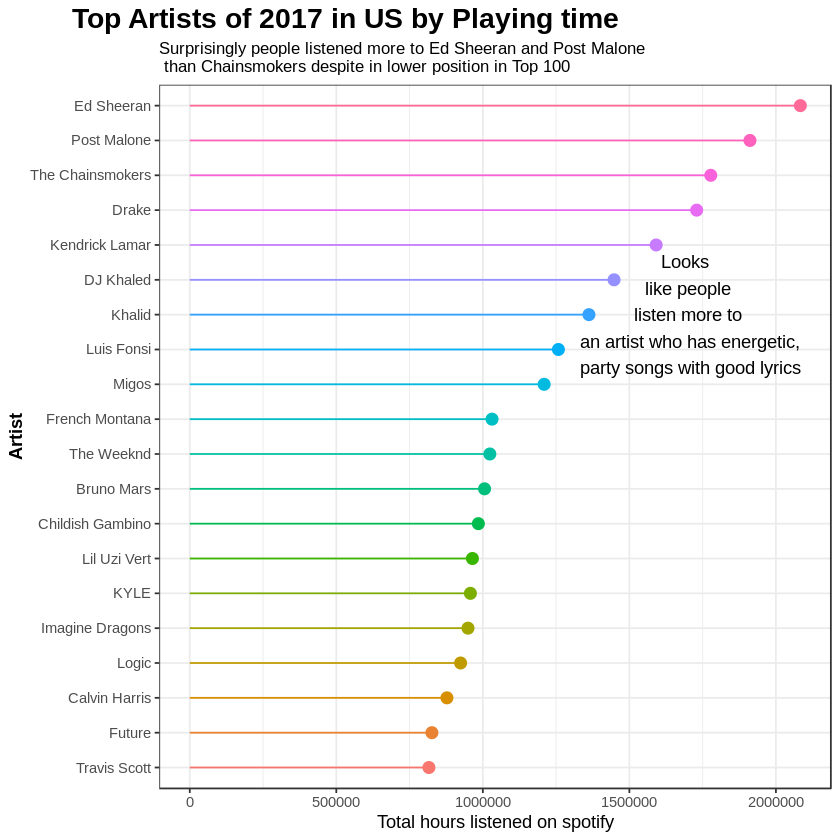

In [154]:
ggplot(top20_by_playtime, aes(x=artists, y=n_time, color=artists)) +
    geom_point(size=3) + 
    geom_segment(aes(x=artists, xend=artists, y=0, yend=n_time)) +
    labs(title = "Top Artists of 2017 in US by Playing time",subtitle="Surprisingly people listened more to Ed Sheeran and Post Malone \n than Chainsmokers despite in lower position in Top 100", x='Artist',y='Total hours listened on spotify') +
    theme_bw() +
    annotate("text", x = 14 , y = 1700000, label = "Looks \n like people \n listen more to \n an artist who has energetic,\n party songs with good lyrics", color = "black") +
    theme(legend.position = 'none', plot.title = element_text(size=17,hjust = -0.7, face = "bold"),plot.subtitle = element_text(size=10,hjust = 0, color = "black"), axis.title.y = element_text(face = "bold"), axis.title.x = element_text(angle = 0)) +
    coord_flip()

In [101]:
ed_sheeran_daily <- daily_spotify %>%
    filter(Region == "us", Artist == "Ed Sheeran", Position <= 100)

formatted_ed <- ed_sheeran_daily %>%
    group_by(Track.Name) %>%
    summarise(n_daily = n()) %>%
    arrange(desc(n_daily))

formattable(formatted_ed)

Track.Name,n_daily
<fct>,<int>
Shape of You,364
Perfect,148
Castle on the Hill,104
Galway Girl,62
Perfect Duet (Ed Sheeran & BeyoncÃ©),39
Happier,35
Dive,31
New Man,22
How Would You Feel (Paean),20


In [102]:
daily_spotify$Date <- as.Date(daily_spotify$Date,format = "%d-%m-%Y")


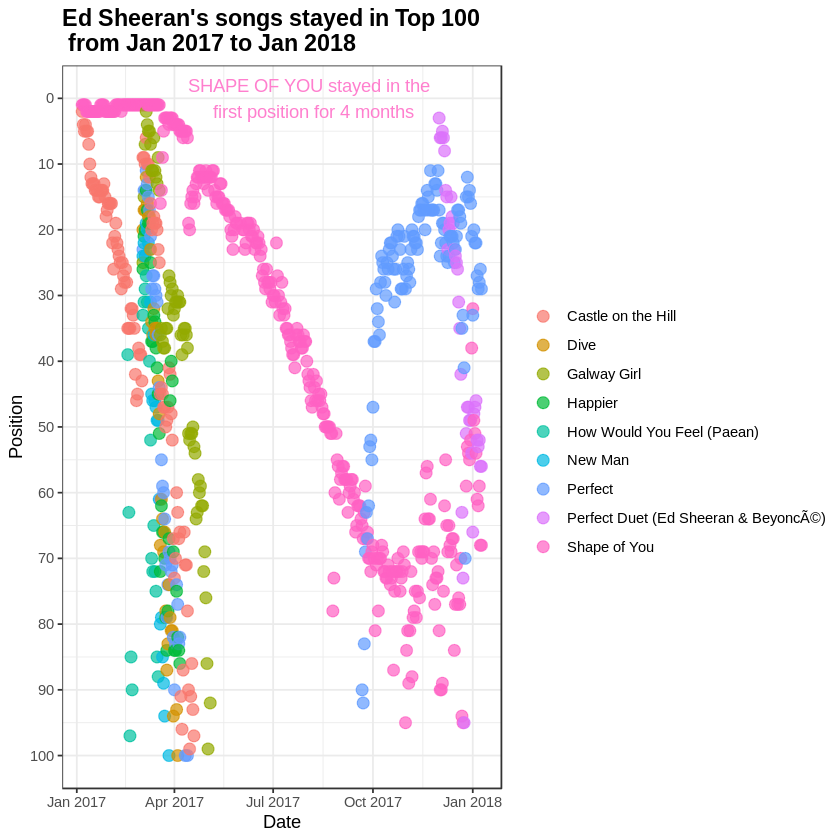

In [120]:
ed_20 <- ed_sheeran_daily %>%
    group_by(Track.Name) %>%
    summarise(n_daily = n()) %>%
    filter(n_daily >= 20) %>%
    select(Track.Name)

ed_20 <- ed_20 %>% collect %>% .[["Track.Name"]] # in order to turn that tibble into a list


ed_daily_plot <- ed_sheeran_daily %>%
    filter(Track.Name %in% ed_20) %>%
    ggplot(aes(x = as.Date(Date,format = "%d-%m-%Y"), y = Position, col = Track.Name)) + 
    geom_point(alpha = 0.7, size = 3) +
    scale_y_reverse(breaks = seq(0,100,10)) +
    scale_x_date("Date") +
    ggtitle("Ed Sheeran's songs stayed in Top 100 \n from Jan 2017 to Jan 2018") + 
    theme_bw() +
    annotate("text", x = as.Date('5-8-2017',format = "%d-%m-%Y"), y = 0, label = "SHAPE OF YOU stayed in the \n first position for 4 months", color = "#FF7FCE") +
    theme(plot.title = element_text(size = 14, face = "bold")) +
    theme(legend.title=element_blank())

ed_daily_plot

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.91 loaded


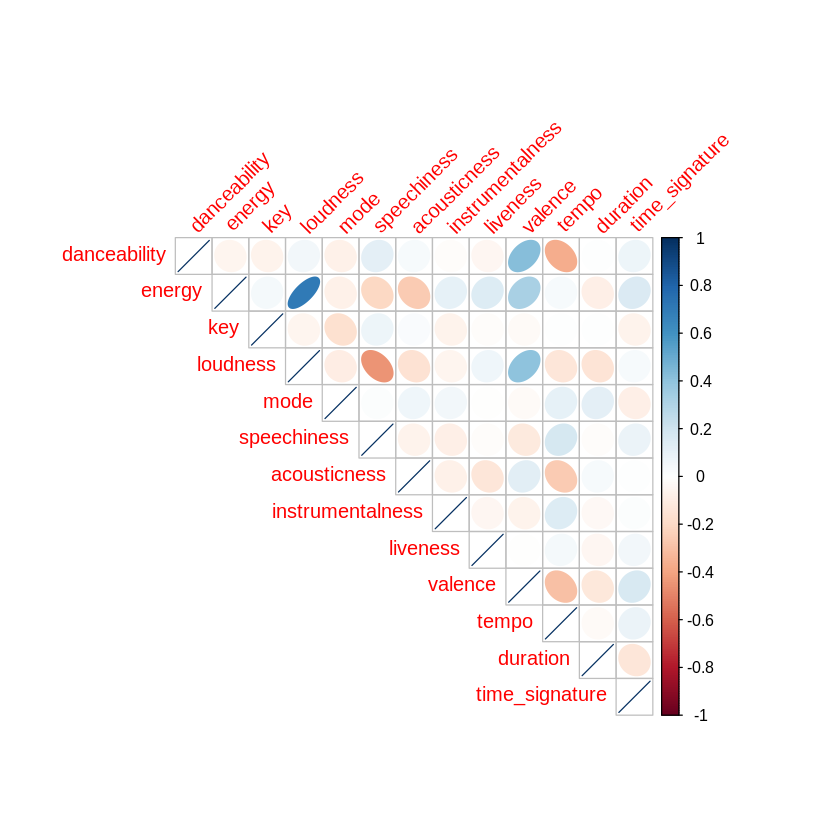

In [19]:
install.packages("corrplot")
library(corrplot)
spotify_data_num <- spotify[,-(1:3)]
mtCor <- cor(spotify_data_num)
corrplot(mtCor, method = "ellipse", type = "upper", tl.srt = 45)

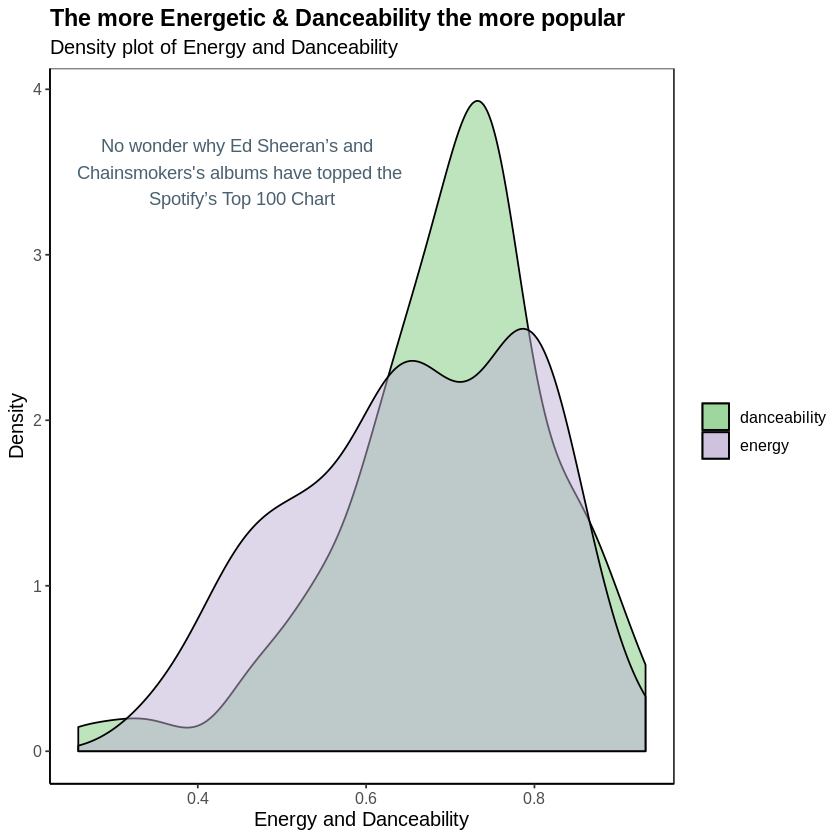

In [82]:
correlated_density <- ggplot(spotify) +
    geom_density(aes(danceability, fill ="danceability"), alpha = 0.5) +
    geom_density(aes(energy, fill ="energy"),alpha = 0.5) + 
    scale_x_continuous(name = "Energy and Danceability") +
    scale_y_continuous(name = "Density") +
    ggtitle("The more Energetic & Danceability the more popular","Density plot of Energy and Danceability") +  
    annotate("text", x = 0.45, y = 3.5, label = "No wonder why Ed Sheeran’s and \n Chainsmokers's albums have topped the \n Spotify’s Top 100 Chart", alpha = 0.9, color = "#37515F") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    theme(plot.title = element_text(size = 14, face = "bold") ,
          text = element_text(size = 12)) +
    theme(legend.title=element_blank()) +
    scale_fill_brewer(palette="Accent")

correlated_density

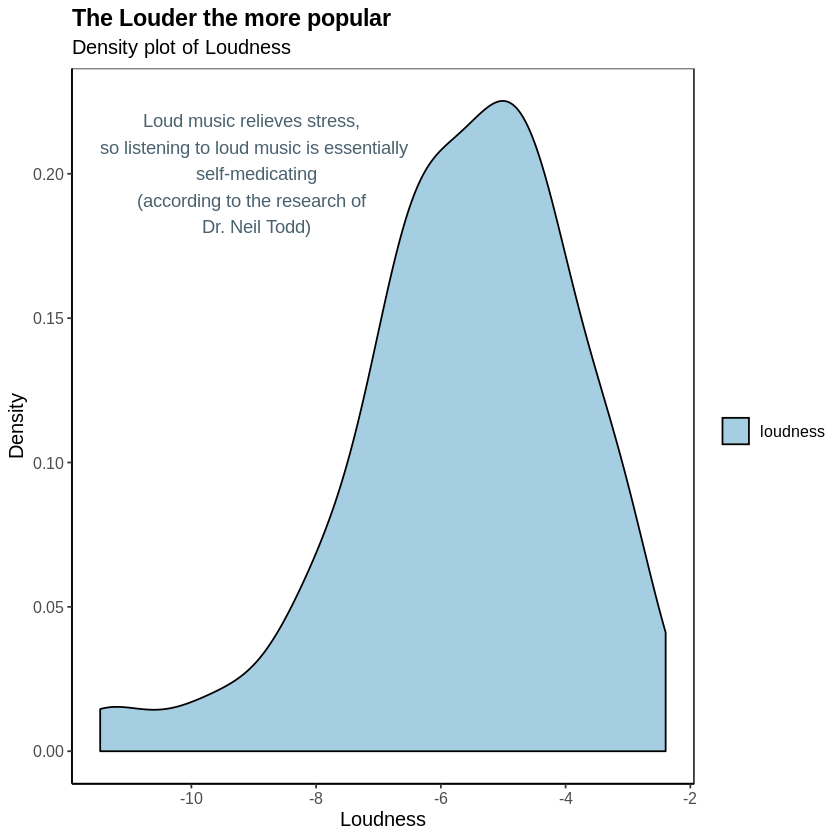

In [92]:
loudness_density <- ggplot(spotify) +
    geom_density(aes(loudness, fill ="loudness")) + 
    scale_x_continuous(name = "Loudness") +
    scale_y_continuous(name = "Density") +
    ggtitle("The Louder the more popular","Density plot of Loudness") +
    annotate("text", x = -9, y = 0.2, label = "Loud music relieves stress, \n so listening to loud music is essentially \n self-medicating\n(according to the research of \n Dr. Neil Todd)", alpha = 0.9, color = "#37515F") +
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black")) +
    theme(plot.title = element_text(size = 14, face = "bold"),
            text = element_text(size = 12)) +
    theme(legend.title=element_blank()) +
    scale_fill_brewer(palette="Paired")

print(loudness_density)